## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
import cv2
%matplotlib inline

## Read in an Image

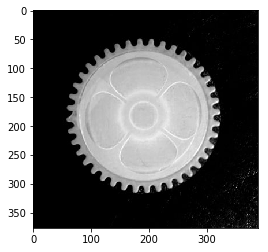

In [3]:
#reading in an image
image = cv2.imread('test/gearcount_01.png')

# printing out some stats and plotting
# print('This image is:', type(image), 'with dimesions:', image.shape)
# cv2.imshow('original', image)
plt.imshow(image)

In [4]:
def grayscale(img):
    """Applies the Grayscale transform"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

# Python 3 has support for cool math symbols.
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test Images

In [5]:
def gear_process(img_path):
    orig = cv2.imread(img_path)
    img = orig.copy()
    
    #After Applying Threshold
    gray = grayscale(img)
    blur = gaussian_blur(gray, 5)
    ret,threshold = cv2.threshold(blur, 105, 255 , cv2.THRESH_BINARY)
    
    #Counting the Number of teeth
    im2,contours,hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    print(len(contours))
    # cv2.drawContours
    kle = cv2.drawContours(im2, contours, -1, (255,0,0), 1)
    # cv2.imshow('draw', im2)
    cnt = contours[0]
    x,y,w,h = cv2.boundingRect(cnt)
    # cv2.rectangle(kle,(x,y),(x+w,y+h),(255,255,0),2)
    aspect_ratio = float(w)/h
    print(aspect_ratio)
    print(x,y,w,h)
    radius = w/2
    print(radius)
    c_x,c_y=(x+w/2),(y+h/2)
    print(c_x,c_y)
    
    # making radius and center as ints rather than floats
    # TODO: check how to make float acceptable
    radius = 132
    c_x,c_y=192,183
    
    cv2.circle(kle, (c_x,c_y), radius, [255,255,255], 1)
    
    hull = cv2.convexHull(cnt, returnPoints = False)
    defects = cv2.convexityDefects(cnt,hull)


    kle = cv2.cvtColor(kle, cv2.COLOR_GRAY2BGR)
    r, g, b = cv2.split(kle)
    kle = cv2.merge((b, g, r))
    
    teeth_count = 0
    for i in range(defects.shape[0]):
        s,e,f,d = defects[i,0]
        start = tuple(cnt[s][0])
        end = tuple(cnt[e][0])
        far = tuple(cnt[f][0])
        # print (start, end, far)
        # if far to center distance is >= radius ignore
        # Note: ignore even if approximately equal to radius 
        # else
        teeth_count += 1
        cv2.circle(kle,far,1,[0,255,0],-1)
        
    # cv2.drawContours(kle, defects, -1, [0,255,0], 3)
    
    # TODO: calculate the distance between far in the above loop to the c_x,c_y circle center
    # This should give you the radius of inner-circle.
    # NOTE: calculate all far-center distances and average to reduce noise

    print(teeth_count)
    # mark center of circle
    cv2.circle(kle,(c_x,c_y),2,[0,0,255],-1)
    
    # draw square starting from center
    # cv2.rectangle(kle,(c_x,c_y),(c_x+radius,c_y+radius),[0,0,255],1)
    
    result = kle # weighted_img(orig, kle)
    cv2.imwrite('test/output_' + img_path, result)
    
    plt.imshow(result)
    plt.show()

1
1.0
60 51 265 265
132.5
192.5 183.5
41


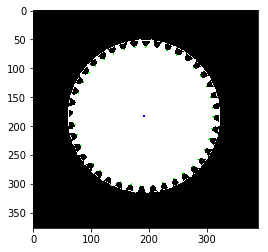

In [6]:
gear_process('test/gearcount_01.png')